In [28]:
from rootedtrees import *
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

# Order Conditions

In [29]:
for t in trees_up_to_order(3):
    print(RK_order_cond(t, 3, explicit = True), " = 0 \n")

0.0  = 0 

b0 + b1 + b2 - 1.0  = 0 

a10*b1 + b2*(a20 + a21) - 0.5  = 0 

a10*a21*b2 - 0.166666666666667  = 0 

a10**2*b1 + b2*(a20 + a21)**2 - 0.333333333333333  = 0 



## Set some coefficients to 0

$$\begin{array}{c|ccc}
    c_1 & a_{11} & 0&a_{13}\\
    c_2 & a_{21} &a_{22}&a_{23}\\
    c_3 & 0 & a_{32} &a_{33}\\
    \hline
    & b_1 & 0 & b_3
\end{array}$$

In [30]:
A_mask = [[1,0,1],
         [1,1,1],
         [0,1,1]]
b_mask = [1,0,1]

for t in trees_up_to_order(3):
    print(RK_order_cond(t, 3, explicit = False, A_mask = A_mask, b_mask = b_mask), " = 0 \n")

0.0  = 0 

b0 + b2 - 1.0  = 0 

b0*(a00 + a02) + b2*(a21 + a22) - 0.5  = 0 

b0*(a00*(a00 + a02) + a02*(a21 + a22)) + b2*(a21*(a10 + a11 + a12) + a22*(a21 + a22)) - 0.166666666666667  = 0 

b0*(a00 + a02)**2 + b2*(a21 + a22)**2 - 0.333333333333333  = 0 



# Apply RK Scheme

In [31]:
plt.rcParams["figure.figsize"] = (3,3)

In [32]:
def f(t, y):
    return [y[2], y[3], -y[0] / ((y[0] ** 2 + y[1] ** 2) ** (3 / 2)), -y[1] / ((y[0] ** 2 + y[1] ** 2) ** (3 / 2))]

y0 = [1,0,0,1]
t0, t_end, n = 0.0, 100.0, 500

# Explicit Midpoint

In [33]:
A = [[0,0], [0.5,0]]
b = [0,1]
method = RK(A,b)

print("Order: ", method.order())

Order:  2


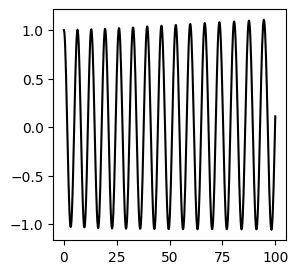

In [34]:
t_vals, y_vals = method.run(y0, t0, t_end, f, n, plot = True, plot_dims = [0], plot_kwargs = {"color" : "black"})
plt.show()

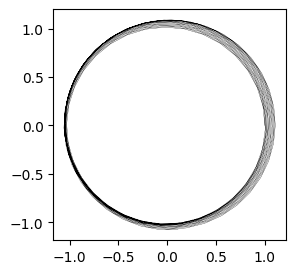

In [35]:
plt.plot(np.array(y_vals)[:,0], np.array(y_vals)[:,1], linewidth = 0.2, color = "black")
plt.show()

# Implicit Midpoint

In [36]:
A = [[0.5]]
b = [1]
method = RK(A,b)

print("Order: ", method.order())

Order:  2


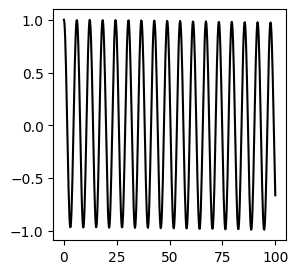

In [37]:
t_vals, y_vals = method.run(y0, t0, t_end, f, n, plot = True, plot_dims = [0], plot_kwargs = {"color" : "black"})
plt.show()

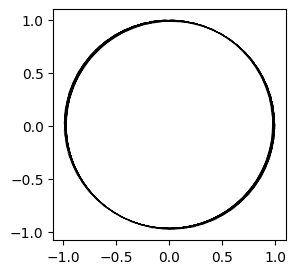

In [38]:
plt.plot(np.array(y_vals)[:,0], np.array(y_vals)[:,1], linewidth = 0.2, color = "black")
plt.show()

# Gauss-Legendre

In [39]:
A = [[1/4, 1/4 - sqrt(3) / 6],
    [1/4 + sqrt(3)/6, 1/4]]
b = [1/2, 1/2]
method = RK(A,b)

print("Order: ", method.order())

Order:  4


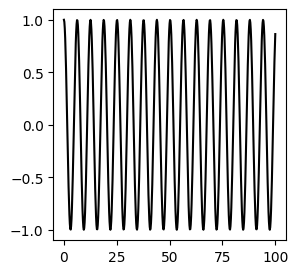

In [40]:
t_vals, y_vals = method.run(y0, t0, t_end, f, n, plot = True, plot_dims = [0], plot_kwargs = {"color" : "black"})
plt.show()

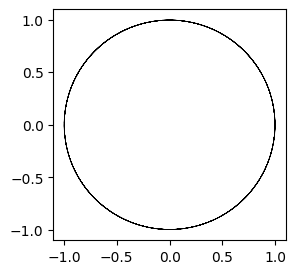

In [41]:
plt.plot(np.array(y_vals)[:,0], np.array(y_vals)[:,1], linewidth = 0.2, color = "black")
plt.show()